# Hotel Analysis
#### The Terminalator
In the following script we will review:
* [Exploratory Data Analysis](#eda)
* [Data Cleaning](#clean)
* [Outlier Detection](#outlier)

In [ ]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
#print(os.getcwd())

In [3]:
# Read in data
df = pd.read_csv('data/hotel_bookings.csv')

### Exploratory Data Analysis <a id='eda' > </a>

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [90]:
df.shape

(119390, 32)

In [82]:
#Check for missing values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
#Number of countries represented per hotel
df.groupby(['hotel']).country.value_counts()

hotel         country
City Hotel    PRT        30960
              FRA         8804
              DEU         6084
              GBR         5315
              ESP         4611
                         ...  
Resort Hotel  TGO            1
              TUN            1
              UGA            1
              UZB            1
              ZMB            1
Name: country, Length: 291, dtype: int64

In [25]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [36]:
#Percent of requests that are cancelations
(df['is_canceled'].sum())/(df['is_canceled'].size)*100

37.041628277075134

Text(0.5, 1.0, 'Hotel Type vs # of Cancellations')

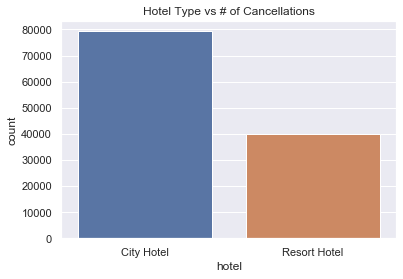

In [4]:
#Visualize hotel by type and number of cancellations
hoteltype = df.groupby('hotel').is_canceled.count().reset_index()
hoteltype.columns = ['hotel','count']
sns.set(style='darkgrid')
ax = sns.barplot(x='hotel',y='count', data=hoteltype)
ax.set_title("Hotel Type vs # of Cancellations")

In [19]:
#I think lead time represents how much time takes place between when a reservation is made and a stay/cancel happens
df.lead_time.describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Text(0.5, 1.0, 'Cancelations by Hotel and Total Lead Time')

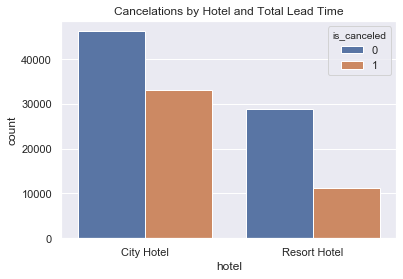

In [5]:
cancel_df = df.groupby(['hotel','is_canceled']).lead_time.count().reset_index()
cancel_df.columns = ['hotel','is_canceled','count']
ax = sns.barplot(x = 'hotel', y = 'count', hue = 'is_canceled', data = cancel_df)
ax.set_title('Cancelations by Hotel and Total Lead Time')

In [91]:
#Find dates where people cancelled their reservations
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])
is_cancelled_plot=df.groupby("reservation_status_date").is_canceled.sum().reset_index().sort_values(by=["reservation_status_date"])
is_cancelled_plot.head()

,reservation_status_date,is_canceled
0,2014-10-17,180
1,2014-11-18,1
2,2015-01-01,763
3,2015-01-02,16
4,2015-01-18,1


In [44]:
#Identify high cancellation dates
temp = df.groupby("reservation_status_date").is_canceled.sum().reset_index().sort_values(by=["is_canceled"], ascending = False)
temp.head()

,reservation_status_date,is_canceled
233,2015-10-21,1373
126,2015-07-06,783
2,2015-01-01,763
634,2016-11-25,713
322,2016-01-18,593


In [50]:
#Date with most amount of cancellations
is_cancelled_plot.iloc[is_cancelled_plot['is_canceled'].argmax()]

reservation_status_date    2015-10-21 00:00:00
is_canceled                               1373
Name: 233, dtype: object

In [65]:
#Dates that have cancellations above the mean
is_cancelled_plot[is_cancelled_plot['is_canceled'] > is_cancelled_plot['is_canceled'].mean()].sort_values('is_canceled', ascending = False)

,reservation_status_date,is_canceled
233,2015-10-21,1373
126,2015-07-06,783
2,2015-01-01,763
634,2016-11-25,713
322,2016-01-18,593
...,...,...
196,2015-09-14,48
653,2016-12-14,48
455,2016-05-30,48
276,2015-12-03,48


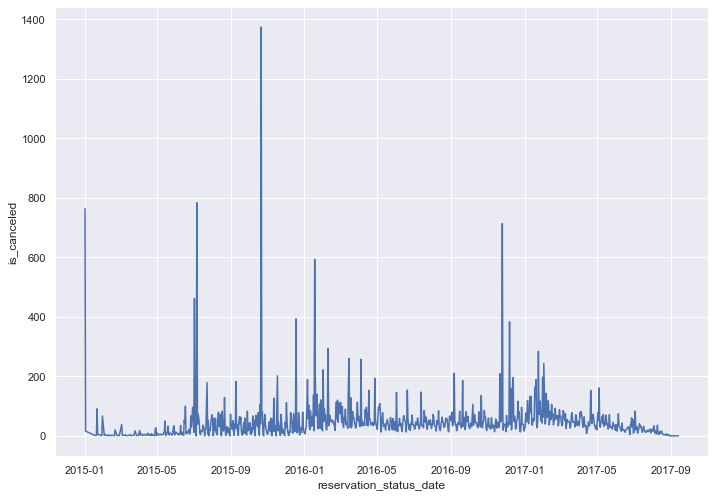

In [81]:
#Date vs Number of Cancellations
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x="reservation_status_date", y="is_canceled", data=is_cancelled_plot[2:])

In [69]:
days = pd.date_range("2015-01-01", "2017-09-14", freq='D')
is_cancelled_fill=pd.DataFrame({"reservation_status_date":days})
is_cancelled_fill=pd.merge(is_cancelled_plot[2:],is_cancelled_fill,on="reservation_status_date", how="outer")
is_cancelled_fill=is_cancelled_fill.fillna(0)
is_cancelled_fill

,reservation_status_date,is_canceled
0,2015-01-01,763.0
1,2015-01-02,16.0
2,2015-01-18,1.0
3,2015-01-20,2.0
4,2015-01-21,91.0
...,...,...
983,2015-06-07,0.0
984,2015-06-21,0.0
985,2015-06-28,0.0
986,2017-09-11,0.0


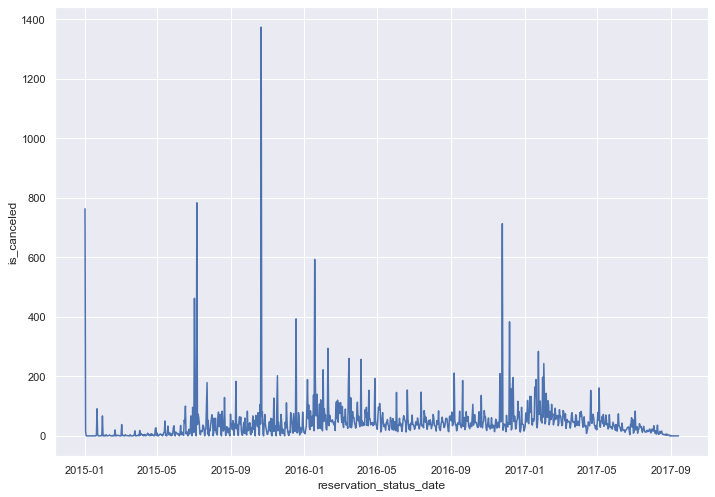

In [82]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x="reservation_status_date", y="is_canceled", data=is_cancelled_fill)

### Data Cleaning <a id='clean' > </a>

In [ ]:
#cover data cleaning
#Missing values/imputation

### Outlier Detection <a id='outlier' > </a>

In [ ]:
AllindexOutlier=[]    
df_table = is_cancelled_fill["is_canceled"].copy()
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print(Q1)
print(Q3)
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound) )
outliers_vector
outliers = df_table[outliers_vector]
listOut=outliers.index.to_list()
for t in listOut:
    AllindexOutlier.append(t)